In [1]:
# %%
import numpy as np
import pandas as pd
import sys
import os
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:

# Добавляем путь к нашей песочнице если нужно
current_dir = os.getcwd()  # путь к notebooks
optimization_path = r"src"
if optimization_path not in sys.path:
    sys.path.append(optimization_path)

In [3]:
from src.spore_tree_config import SporeTreeConfig
from src.spore_tree import SporeTree
from src.pendulum import PendulumSystem
from src.visualize_spore_tree import visualize_spore_tree
from src.find_optimal_dt_vector import find_optimal_dt_vector

from src.area_opt.get_tree_area import get_tree_area



In [4]:
pendulum = PendulumSystem(
    g=9.81,
    l=2.0, 
    m=1.0,
    damping=0.05,
    max_control=2.0
)

In [5]:
init_position = np.array([0.0 , 0.0], dtype=np.float64)
    
cfg = SporeTreeConfig(
    initial_position=init_position,
    dt_base=0.1,
    dt_grandchildren_factor=0.1,
    figure_size=(10, 15),
    max_iterations=1000
)


optimal_dt = find_optimal_dt_vector(
    init_position, 
    pendulum=pendulum, 
    config=cfg,
    area_optimization_dt_bounds=(0.001, 0.1),  # Меньший максимум
    show=True
)
print(optimal_dt)

ПОИСК ОПТИМАЛЬНОГО ВЕКТОРА DT
Начальная позиция: [0. 0.]
Параметры оптимизации из конфига:
  constraint_distance: 0.0001
  pair_dt_bounds (для поиска пар): (0.001, 0.2)
  area_dt_bounds (для оптимизации площади): (0.001, 0.1)
  max_iterations: 1000
  optimization_method: SLSQP

Этап 1: Создание исходного дерева...
Дерево создано: 4 детей, 8 внуков

Этап 2: Поиск оптимальных пар...
ЗАПУСК ПАЙПЛАЙНА ПОИСКА ОПТИМАЛЬНЫХ ПАР...
1️⃣ Вычисление скоростей сближения... ✅ (12 пар внук-внук, 8 пар внук-родитель)
2️⃣ Поиск сближающихся пар... ✅ (12 внук-внук, 8 внук-родитель)
3️⃣ Оптимизация пар... 
    📏 Distance constraint: 0.00495
    📊 Адаптивные границы dt: (0.001, 0.20000)
    Оптимизация gc_0-gc_3...
    Оптимизация gc_4-gc_7...
    Оптимизация gc_0-gc_4...
    Оптимизация gc_3-gc_7...
    Оптимизация gc_1-gc_6...
    Оптимизация gc_2-gc_5...
    Оптимизация gc_0-gc_2...
    Оптимизация gc_4-gc_6...
    Оптимизация gc_2-gc_7...
    Оптимизация gc_3-gc_6...
    Оптимизация gc_0-gc_5...
    О

Площадь: 0.000841


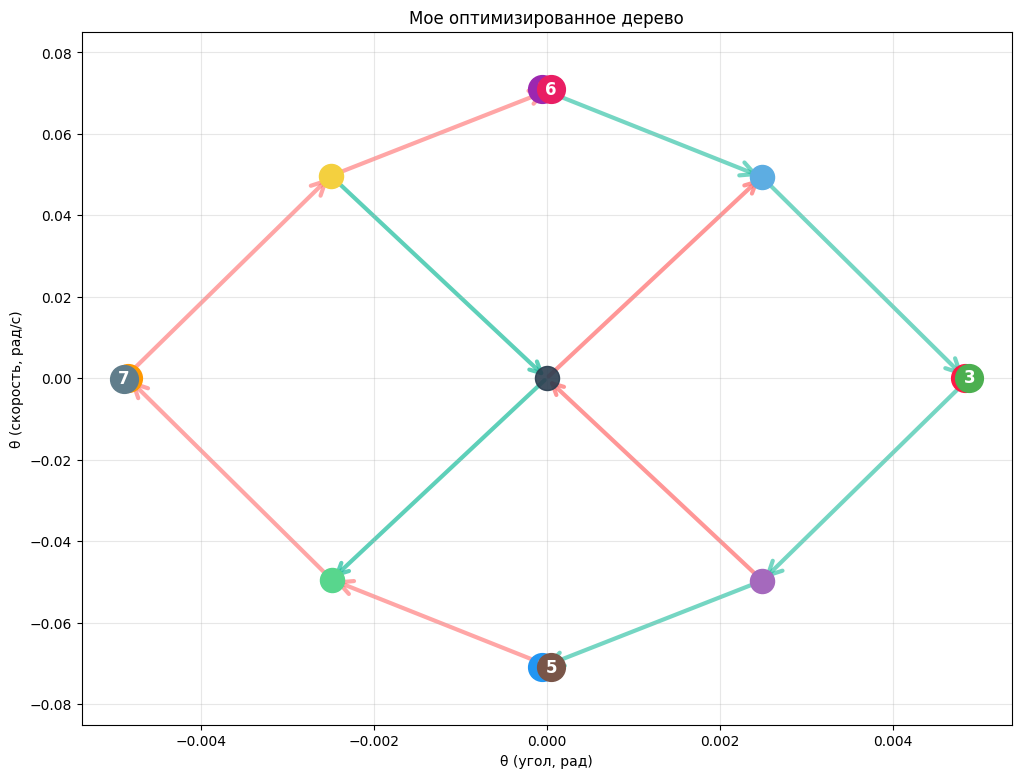

In [6]:
dt_children = optimal_dt[:4]
dt_grandchildren = optimal_dt[4:12]

optimized_tree = SporeTree(
    pendulum=pendulum,
    config=cfg,
    dt_children=dt_children,
    dt_grandchildren=dt_grandchildren
)

visualize_spore_tree(optimized_tree, "Мое оптимизированное дерево")
print(f"Площадь: {get_tree_area(optimized_tree):.6f}")